# Regularization

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [31]:
X, y = make_moons(100, noise=0.25,random_state=2)

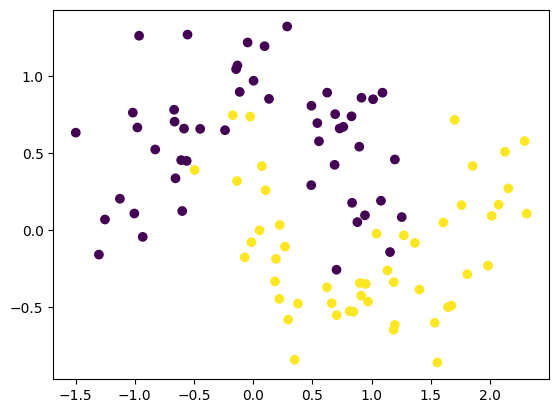

In [32]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [33]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               384       
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 6s 655us/step


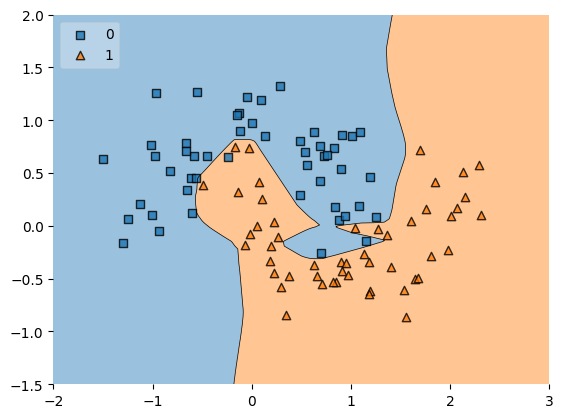

In [35]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

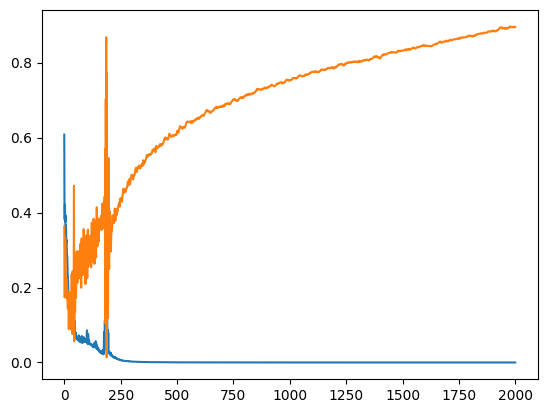

In [36]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [37]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               384       
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 7s 713us/step


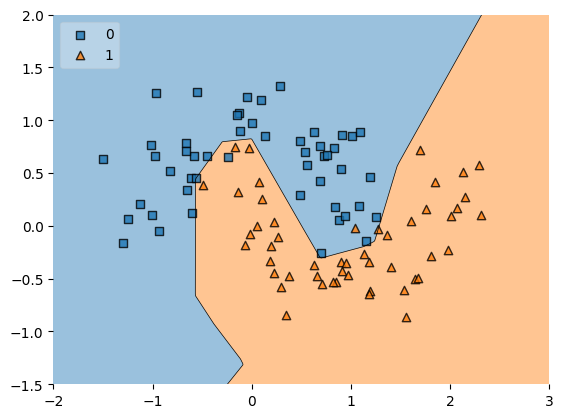

In [39]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

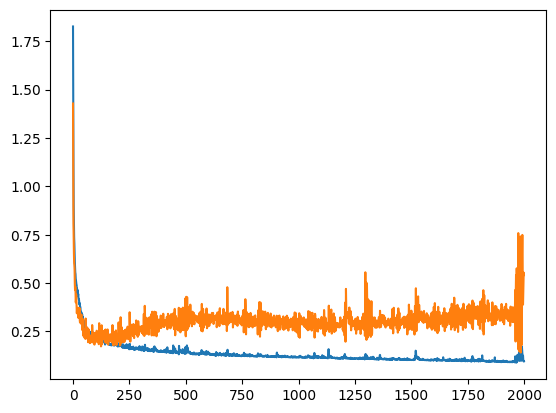

In [40]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [41]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

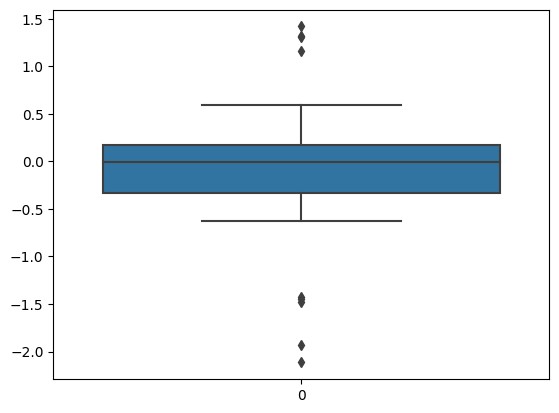

In [42]:
sns.boxplot(model1_weight_layer1)

<Axes: >

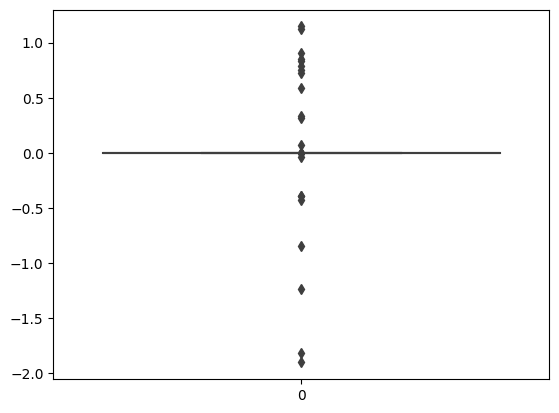

In [43]:
sns.boxplot(model2_weight_layer1)

In [44]:
model1_weight_layer1.min()

-2.1151946

In [45]:
model2_weight_layer1.min()

-1.9004492

C:\Users\panka\AppData\Local\Temp\ipykernel_14296\2224180084.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
C:\Users\panka\AppData\Local\Temp\ipykernel_14296\2224180084.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

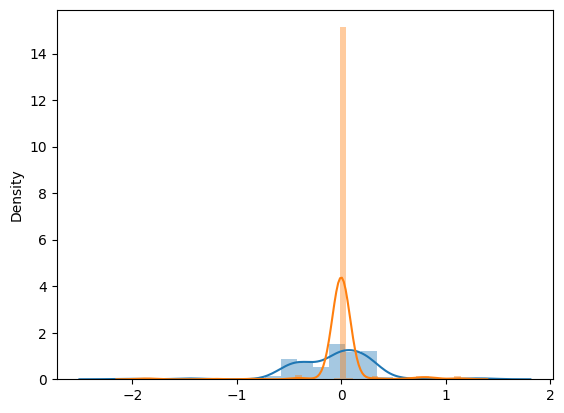

In [46]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)

In [47]:
model1.get_weights()[0].reshape(256)

array([-3.34910423e-01, -4.85584885e-01,  1.05438203e-01,  2.96408019e-04,
        2.55799443e-01,  2.38038048e-01, -1.59409031e-01,  2.44442523e-01,
        2.85033196e-01, -3.59320849e-01, -2.68967301e-01,  3.17885965e-01,
       -2.34455094e-02, -3.16186100e-01, -3.26934904e-01,  2.46606112e-01,
       -3.01775746e-02,  3.22121978e-01, -3.09726149e-01,  1.93990059e-02,
       -5.11489689e-01, -5.72317503e-02, -5.31674564e-01, -5.26603818e-01,
        3.69070411e-01, -5.34644186e-01, -5.45572281e-01, -1.82800248e-01,
       -2.88946292e-04, -5.75402141e-01,  8.97880420e-02, -3.84523600e-01,
       -2.85058506e-02,  9.39724967e-02, -3.65961552e-01,  1.06444180e-01,
       -4.32029247e-01, -4.28969771e-01,  2.28984296e-01, -1.05761541e-02,
        5.44450507e-02,  3.22076857e-01,  8.27671513e-02, -5.09817123e-01,
       -4.20953751e-01,  3.00080389e-01,  2.62560904e-01, -2.35947460e-01,
       -6.14931345e-01,  1.80424169e-01, -3.07069510e-01, -2.51091808e-01,
       -7.76415244e-02,  